<a href="https://colab.research.google.com/github/diogo-gb/2025ApiProject/blob/main/AgroSense_V4_B_0%2C22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando Dependencias do YoLo V8
!pip install ultralytics
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from google.colab import drive

# Vai tentar montar o Drive
try:
  drive.flush_and_unmount()
  print('Drive unmounted successfully.')
except ValueError:
  pass  # Ignore se o Drive estiver Montado

# Monta o Google Drive
drive.mount('/content/drive')
print('Drive mounted successfully.')

Drive unmounted successfully.
Mounted at /content/drive
Drive mounted successfully.


In [ ]:
#Biblioteca para fazer Data Augmentation
!pip install albumentations

In [ ]:
import os

# Caminho da pasta principal
base_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22'

# Verificar se o caminho base existe
if not os.path.exists(base_path):
    print(f"O caminho base '{base_path}' não foi encontrado.")
else:
    print(f"Conteúdo de '{base_path}': {os.listdir(base_path)}")

    # Listar as subpastas train, test e val
    for folder in ['train', 'test', 'val']:
        folder_path = os.path.join(base_path, folder)
        if os.path.exists(folder_path):
            print(f"\nConteúdo de '{folder_path}': {os.listdir(folder_path)}")
        else:
            print(f"Aviso: O caminho '{folder_path}' não foi encontrado.")

Conteúdo de '/content/drive/MyDrive/AgroSense-V4-B_0.22': ['val', 'test', 'train', 'data.yaml']

Conteúdo de '/content/drive/MyDrive/AgroSense-V4-B_0.22/train': ['labels', 'images']

Conteúdo de '/content/drive/MyDrive/AgroSense-V4-B_0.22/test': ['labels', 'images']

Conteúdo de '/content/drive/MyDrive/AgroSense-V4-B_0.22/val': ['labels', 'images']


In [ ]:
import os

# Caminho da pasta principal
base_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22'

# Subpastas
folders = ['train', 'test', 'val']
subfolders = ['images', 'labels']

# Dicionário para armazenar as contagens
counts = {folder: {subfolder: 0 for subfolder in subfolders} for folder in folders}

# Função para contar arquivos
def count_files(folder_path):
    if os.path.exists(folder_path):
        return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    else:
        print(f"Aviso: O caminho '{folder_path}' não foi encontrado e será ignorado.")
        return 0

# Contar os arquivos em cada subpasta
for folder in folders:
    for subfolder in subfolders:
        path = os.path.join(base_path, folder, subfolder)
        print(f"Verificando {path}...")  # Para depuração
        counts[folder][subfolder] = count_files(path)

# Exibir resultados
for folder in counts:
    print(f"\nPasta {folder}:")
    for subfolder in counts[folder]:
        print(f"  {subfolder}: {counts[folder][subfolder]} arquivos")

Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/train/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/train/labels...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/test/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/test/labels...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/val/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/val/labels...

Pasta train:
  images: 184 arquivos
  labels: 184 arquivos

Pasta test:
  images: 24 arquivos
  labels: 24 arquivos

Pasta val:
  images: 36 arquivos
  labels: 36 arquivos


In [ ]:
import os

# Caminho base onde estão as pastas
base_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22'

# Nomes das pastas para verificar
folders = ['train', 'test', 'val']

# Quantidades esperadas de imagens em cada pasta
expected_counts = {
    'train': 184,  # Modifique o valor conforme o número esperado
    'test': 24,     # Modifique o valor conforme o número esperado
    'val': 36      # Modifique o valor conforme o número esperado
}

def count_images_in_folder(folder_path):
    """Conta o número de imagens (.jpg, .jpeg, .png, .bmp e .tiff) em uma pasta."""
    image_extensions = ['.jpg', '.jpeg', '.png', 'bmp', 'tiff']
    return sum(1 for filename in os.listdir(folder_path) if os.path.splitext(filename)[1].lower() in image_extensions)

def check_folders(base_path, folders, expected_counts):
    all_ok = True
    for folder in folders:
        # Caminho para a subpasta 'img' dentro de cada pasta (train/img, test/img, val/img)
        folder_path = os.path.join(base_path, folder, 'images')

        if os.path.exists(folder_path):
            # Conta as imagens na pasta 'img'
            num_images = count_images_in_folder(folder_path)
            expected = expected_counts.get(folder, 0)

            # Verifica se a quantidade bate com o esperado
            if num_images == expected:
                print(f"✔️ A pasta '{folder}/images' tem {num_images} imagens. Tudo OK!")
            else:
                print(f"⚠️ A pasta '{folder}/images' tem {num_images} imagens. Esperado: {expected}. Algo está faltando!")
                all_ok = False
        else:
            print(f"❌ A pasta '{folder}/images' não foi encontrada!")
            all_ok = False

    if all_ok:
        print("\n✔️ Todas as pastas estão com o número correto de imagens!")
    else:
        print("\n⚠️ Existem inconsistências no número de imagens em algumas pastas.")

# Executa a verificação
check_folders(base_path, folders, expected_counts)

✔️ A pasta 'train/images' tem 184 imagens. Tudo OK!
✔️ A pasta 'test/images' tem 24 imagens. Tudo OK!
✔️ A pasta 'val/images' tem 36 imagens. Tudo OK!

✔️ Todas as pastas estão com o número correto de imagens!


In [ ]:
import albumentations as A
import cv2
import os
import random
import matplotlib.pyplot as plt

# Caminho para a pasta de imagens
dataset_dir = '/content/drive/MyDrive/AgroSense-V4-B_0.22' # Mudar pasta para o V4
train_images_path = os.path.join(dataset_dir, 'train', 'images')

# Defina a transformação que será aplicada
augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),  # Flip horizontal
    A.RandomRotate90(p=0.5),  # Rotação de 90 graus
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5)  # Shift, scale e rotate
])

def augment_images(image_dir, save_dir, num_augmentations=3):
    """
    Aplica Data Augmentation em imagens de um diretório e salva as imagens aumentadas.
    """
    if not os.path.exists(image_dir):
        print(f"\n❌ Diretório de imagens não encontrado: {image_dir}")
        return

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    image_files = os.listdir(image_dir)

    if not image_files:
        print("\n❌ Nenhuma imagem encontrada no diretório de treino!")
        return

    print(f"\n📢 Iniciando Data Augmentation para {len(image_files)} imagens...")

    total_augmented = 0

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)

        if image is None:
            print(f"⚠️ Erro ao carregar imagem: {image_file}, ignorando...")
            continue

        for i in range(num_augmentations):
            augmented = augmentation(image=image)
            augmented_image = augmented['image']
            save_path = os.path.join(save_dir, f"{os.path.splitext(image_file)[0]}_aug_{i}.jpg")
            cv2.imwrite(save_path, augmented_image)
            total_augmented += 1

        print(f"✅ {image_file} - {num_augmentations} imagens geradas")

    print(f"\n🎉 Processo concluído! Total de {total_augmented} imagens aumentadas e salvas em {save_dir}")

# Aumentar as imagens
augmented_save_dir = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images'
augment_images(train_images_path, augmented_save_dir) #corrigir esta parte puxar alem das 184 geradas, as outras originais também


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)



📢 Iniciando Data Augmentation para 184 imagens...
✅ 20200120_225854_JPG.rf.446ba3093a4405f26af12cf9442de302.jpg - 3 imagens geradas
✅ 20200120_230320_JPG.rf.dde0181c4727400ddbf5325a5c5d7efa.jpg - 3 imagens geradas
✅ 20200120_230023_JPG.rf.4c636918b85db3163b60cb0e5931ff4b.jpg - 3 imagens geradas
✅ 20200120_230327_JPG.rf.9e9ca42feab529b690cc207c807a141e.jpg - 3 imagens geradas
✅ 20200120_230733_JPG.rf.f5384c0282152ceae812224e106c6def.jpg - 3 imagens geradas
✅ 20200120_230913_JPG.rf.4161354782cd8d6da160bc801110be8d.jpg - 3 imagens geradas
✅ 20200120_232807_JPG.rf.9150f2408fbf183eb0126bc005ce98bb.jpg - 3 imagens geradas
✅ 20200120_233121_JPG.rf.3a2765f1d84224eeb0bbdbce88c4c56e.jpg - 3 imagens geradas
✅ 20200120_231823_JPG.rf.b385744794ff023f7c0bd159d4cdb2de.jpg - 3 imagens geradas
✅ 20200120_233540_JPG.rf.bf33f0d1cecb72099fa9e4a525fcdd04.jpg - 3 imagens geradas
✅ 20200120_233000_JPG.rf.00c469d5056dcfdc2188ee2499f1b288.jpg - 3 imagens geradas
✅ 20200120_232654_JPG.rf.ef599974b87ef0394aec57

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Caminho da pasta com as imagens aumentadas
dataset_dir = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images'  # Pasta com as imagens aumentadas

# Definindo as pastas para treino, teste e validação dentro de augmented_images
train_dir = os.path.join(dataset_dir, 'train/images')
test_dir = os.path.join(dataset_dir, 'test/images')
val_dir = os.path.join(dataset_dir, 'val/images')

# Crie as pastas se não existirem
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Liste todas as imagens aumentadas no diretório
# Corrigido: listando as imagens na pasta "augmented_images" (antes de mover para as subpastas)
image_files = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Verifique se há imagens na pasta principal antes de prosseguir
if not image_files:
    print("⚠️ Nenhuma imagem encontrada na pasta 'augmented_images'. Certifique-se de que as imagens estejam lá antes de executar este script.")
else:
    # Divida o dataset em 76% para treino, 12% para teste e 12% para validação
    train_files, test_val_files = train_test_split(image_files, test_size=0.24, random_state=42)  # 24% restante
    test_files, val_files = train_test_split(test_val_files, test_size=0.5, random_state=42)  # 12% para cada

    # Função para mover as imagens para as pastas correspondentes
    def move_files(file_list, source_dir, destination_dir):
        for file_name in file_list:
            src_path = os.path.join(source_dir, file_name)
            dst_path = os.path.join(destination_dir, file_name)
            shutil.move(src_path, dst_path)

    # Mover os arquivos para as pastas corretas
    move_files(train_files, dataset_dir, train_dir)  # Mover imagens de treino
    move_files(test_files, dataset_dir, test_dir)  # Mover imagens de teste
    move_files(val_files, dataset_dir, val_dir)  # Mover imagens de validação

    total_images = len(train_files) + len(test_files) + len(val_files)
    print("\n📢 Resumo da divisão de imagens:")
    print(f"📂 Treino: {len(train_files)} imagens ({(len(train_files)/total_images)*100:.2f}%)")
    print(f"📂 Teste: {len(test_files)} imagens ({(len(test_files)/total_images)*100:.2f}%)")
    print(f"📂 Validação: {len(val_files)} imagens ({(len(val_files)/total_images)*100:.2f}%)")
    print(f"📊 Total de imagens: {total_images}")
    print("✅ Imagens organizadas com sucesso nas pastas train, test e val dentro de augmented_images!")


⚠️ Nenhuma imagem encontrada na pasta 'augmented_images'. Certifique-se de que as imagens estejam lá antes de executar este script.


In [ ]:
import os

# Caminho da pasta principal
base_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images'

# Subpastas
folders = ['train', 'test', 'val']
subfolders = ['images', 'labels']

# Dicionário para armazenar as contagens
counts = {folder: {subfolder: 0 for subfolder in subfolders} for folder in folders}

# Função para contar arquivos
def count_files(folder_path):
    if os.path.exists(folder_path):
        return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    else:
        print(f"Aviso: O caminho '{folder_path}' não foi encontrado e será ignorado.")
        return 0

# Contar os arquivos em cada subpasta
for folder in folders:
    for subfolder in subfolders:
        path = os.path.join(base_path, folder, subfolder)
        print(f"Verificando {path}...")  # Para depuração
        counts[folder][subfolder] = count_files(path)

# Exibir resultados
for folder in counts:
    print(f"\nPasta {folder}:")
    for subfolder in counts[folder]:
        print(f"  {subfolder}: {counts[folder][subfolder]} arquivos aumentados") #corrigir para [folder]"arquivos aumentados" [subfolder] arquivos aumentados

Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/train/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/train/labels...
Aviso: O caminho '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/train/labels' não foi encontrado e será ignorado.
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/test/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/test/labels...
Aviso: O caminho '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/test/labels' não foi encontrado e será ignorado.
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/val/images...
Verificando /content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/val/labels...
Aviso: O caminho '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/val/labels' não foi encontrado e será ignorado.

Pasta train:
  images: 419 arquivos aumentados
  labels: 0 arquivos aumentados

Pasta test:
  im

In [ ]:
import os

def check_duplicate_images(original_dir, augmented_dir):
    # Liste as imagens originais (sem o sufixo de aumento)
    original_images = [os.path.splitext(f)[0] for f in os.listdir(original_dir) if os.path.isfile(os.path.join(original_dir, f))]

    # Liste as imagens aumentadas (com o sufixo _aug_)
    augmented_images = [f for f in os.listdir(augmented_dir) if os.path.isfile(os.path.join(augmented_dir, f))]

    # Verificar duplicatas: se alguma imagem aumentada existe com o mesmo nome base que uma imagem original
    duplicate_count = 0
    for original_image in original_images:
        for aug_image in augmented_images:
            if aug_image.startswith(original_image):
                print(f"Duplicata encontrada: {original_image}")
                duplicate_count += 1

    if duplicate_count == 0:
        print("📂Nenhuma duplicata encontrada.")
    else:
        print(f"{duplicate_count} duplicatas encontradas.")

# Caminhos para as pastas de treino
train_images_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22/train/images'  # Pasta de imagens originais
augmented_images_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images'  # Pasta de imagens aumentadas

# Executar a verificação
check_duplicate_images(train_images_path, augmented_images_path)

📂Nenhuma duplicata encontrada.


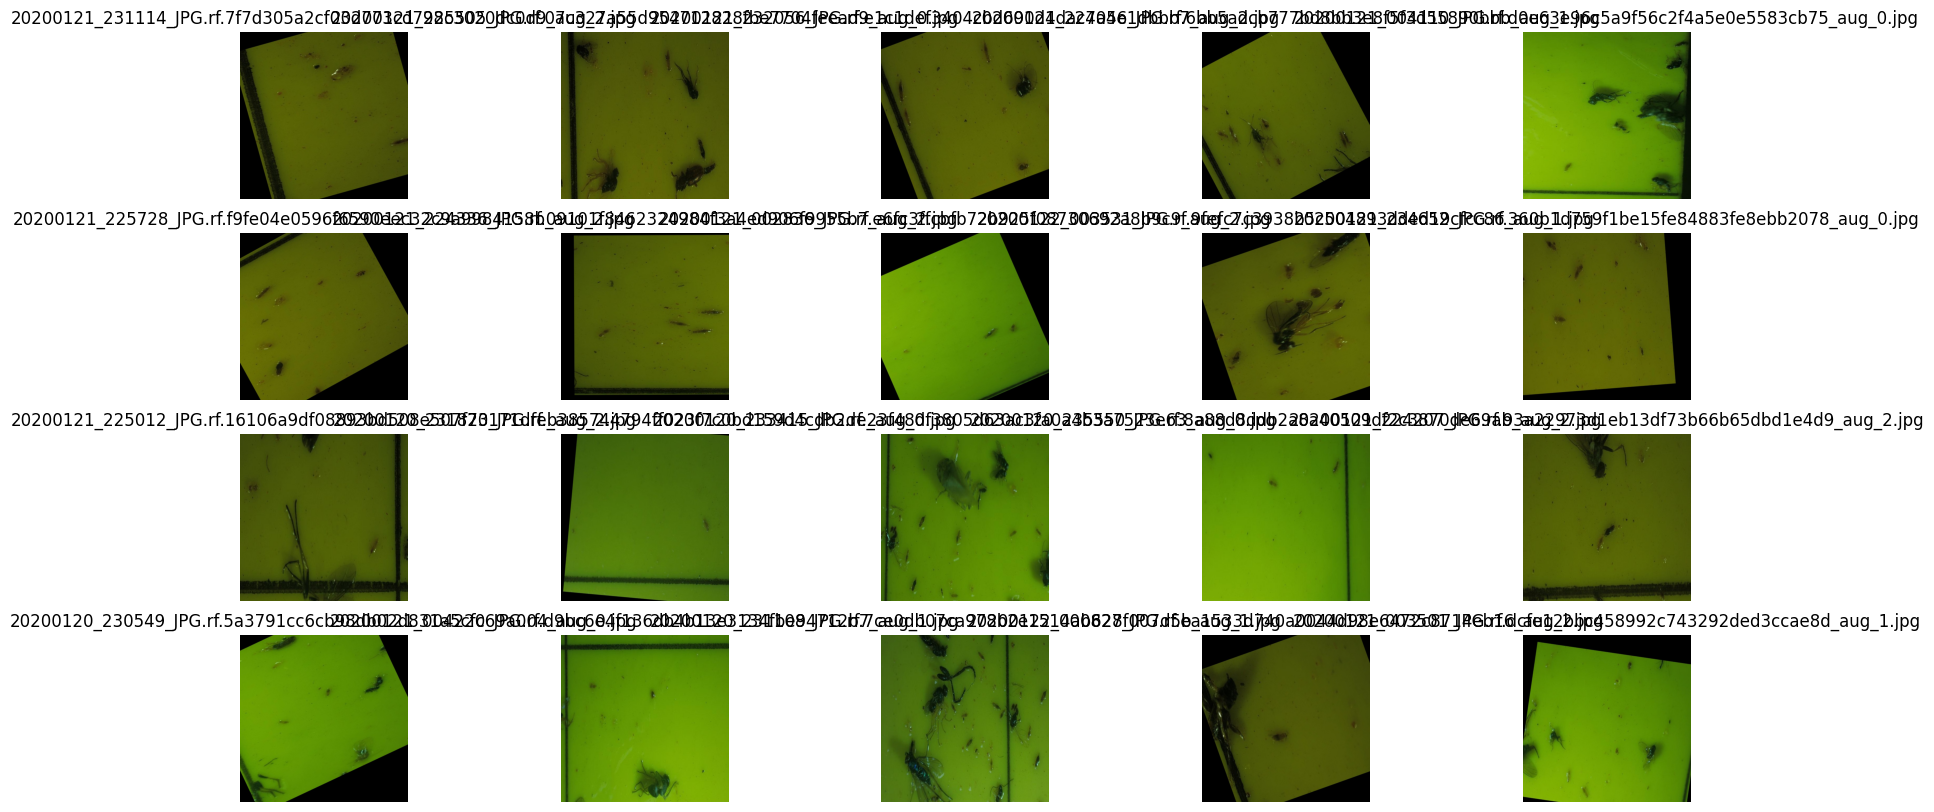

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def show_random_images(image_dir, num_images=20):
    # Liste todas as imagens no diretório
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Verifique se há arquivos no diretório
    if not image_files:
        print("Nenhuma imagem encontrada no diretório.")
        return

    # Se houver menos imagens no diretório do que o número solicitado, ajuste o número
    num_images = min(len(image_files), num_images)

    # Selecione imagens aleatórias
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(20, 10))

    for i, image_file in enumerate(random_images):
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB para mostrar no matplotlib

        plt.subplot(4, 5, i + 1)  # Grid 4x5 para mostrar as imagens
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)

    plt.show()

# Caminho para a pasta de imagens de treino, teste ou validação
image_dir = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images/train/images'  # Troque para test ou val se preferir

# Mostrar 20 imagens aleatórias
show_random_images(image_dir, 20) #aprimorar para formatar o nome da img para exibir

In [ ]:
# Certifique-se de que o caminho para as pastas corretas esteja ajustado
base_dir = '/content/drive/MyDrive/AgroSense-V4-B_0.22/augmented_images'

# Caminhos corretos para as pastas de treino, validação e teste
train_images_path = os.path.join(base_dir, 'train', 'images')
val_images_path = os.path.join(base_dir, 'val', 'images')
test_images_path = os.path.join(base_dir, 'test', 'images')

supported_formats = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']

# Verifique se as imagens nos diretórios estão nos formatos suportados
def check_image_formats(path, formats=supported_formats):
    # Verifique se o diretório existe antes de tentar acessá-lo
    if not os.path.exists(path):
        print(f"Diretório não encontrado: {path}")
        return

    for file in os.listdir(path):
        if file.split('.')[-1].lower() not in formats:
            print(f"Formato não suportado: {file}")
        else:
            print(f"Formato suportado: {file}")

# Verifique o formato das imagens nas pastas de treino, validação e teste
if os.path.exists(train_images_path):
    print("Verificando formatos das imagens de treino...")
    check_image_formats(train_images_path)
else:
    print(f"Diretório de treino não encontrado: {train_images_path}")

if os.path.exists(val_images_path):
    print("Verificando formatos das imagens de validação...")
    check_image_formats(val_images_path)
else:
    print(f"Diretório de validação não encontrado: {val_images_path}")

if os.path.exists(test_images_path):
    print("Verificando formatos das imagens de teste...")
    check_image_formats(test_images_path)
else:
    print(f"Diretório de teste não encontrado: {test_images_path}")


Verificando formatos das imagens de treino...
Formato suportado: 20200120_225854_JPG.rf.446ba3093a4405f26af12cf9442de302_aug_1.jpg
Formato suportado: 20200120_230320_JPG.rf.dde0181c4727400ddbf5325a5c5d7efa_aug_0.jpg
Formato suportado: 20200120_230320_JPG.rf.dde0181c4727400ddbf5325a5c5d7efa_aug_1.jpg
Formato suportado: 20200120_230320_JPG.rf.dde0181c4727400ddbf5325a5c5d7efa_aug_2.jpg
Formato suportado: 20200120_230023_JPG.rf.4c636918b85db3163b60cb0e5931ff4b_aug_1.jpg
Formato suportado: 20200120_230023_JPG.rf.4c636918b85db3163b60cb0e5931ff4b_aug_2.jpg
Formato suportado: 20200120_230733_JPG.rf.f5384c0282152ceae812224e106c6def_aug_0.jpg
Formato suportado: 20200120_230733_JPG.rf.f5384c0282152ceae812224e106c6def_aug_1.jpg
Formato suportado: 20200120_230733_JPG.rf.f5384c0282152ceae812224e106c6def_aug_2.jpg
Formato suportado: 20200120_230913_JPG.rf.4161354782cd8d6da160bc801110be8d_aug_1.jpg
Formato suportado: 20200120_230913_JPG.rf.4161354782cd8d6da160bc801110be8d_aug_2.jpg
Formato suportado: 

In [ ]:
# Instalação do pacote ultralytics
!pip install ultralytics
!pip install wandb

# Importando o objeto YOLO
from ultralytics import YOLO
import os
import shutil
import wandb

# Inicializar o modelo YOLOv8
model = YOLO('yolov8m.yaml')  # Usando um modelo YOLOv8 maior

# Caminho do Google Drive para salvar os resultados
drive_project_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain'
os.makedirs(drive_project_path, exist_ok=True)  # Criar a pasta no Google Drive, se não existir

# Criar pasta para armazenar as imagens de validação
drive_val_batch_path = os.path.join(drive_project_path, 'ResultsValBatch')
os.makedirs(drive_val_batch_path, exist_ok=True)

# Configuração do projeto WandB
project_name = 'yellow_sticky_modelV4-22-2025'
wandb_dir = '/content/ImagesResultsTrain'  # Diretório local para WandB, se necessário

# Certifique-se de que o diretório local também exista
os.makedirs(wandb_dir, exist_ok=True)

# Autenticação no WandB (apenas para o primeiro uso, precisará inserir a chave)
wandb.login()

# Treinamento do modelo
results = model.train(
    data='/content/drive/MyDrive/AgroSense-V4-B_0.22/data.yaml',  # Caminho para o arquivo data.yaml
    epochs=150,               # Número de épocas para o treinamento
    imgsz=640,               # Tamanho da imagem
    batch=16,                # Tamanho do batch
    save=True,               # Salvar os pesos e o modelo
    save_period=10,          # Salvamento dos pesos a cada N épocas
    workers=2,               # Número de workers
    project=drive_project_path,  # Diretório do projeto apontando para o Google Drive
    name='ImagesResultsTrain',   # Nome da pasta para salvar os resultados
    exist_ok=True,           # Permitir sobreposição de resultados anteriores
    amp=True,                # Habilitar mixed precision training
    device='cuda'            # Usar GPU, se disponível
)

# Copiar as imagens de validação para a nova pasta
def copy_val_images(source_folder, destination_folder):
    if os.path.exists(source_folder):
        for file_name in os.listdir(source_folder):
            if file_name.startswith("val_batch") and file_name.endswith(".jpg"):  # Filtrando arquivos de validação
                src_path = os.path.join(source_folder, file_name)
                dst_path = os.path.join(destination_folder, file_name)
                shutil.copy2(src_path, dst_path)
                print(f"Copiado: {file_name}")

val_images_source = os.path.join(drive_project_path, 'ImagesResultsTrain')  # Pasta onde as imagens são salvas
copy_val_images(val_images_source, drive_val_batch_path)

# Exibir links para acessar os resultados
wandb_link = f"https://wandb.ai/AgroSenseTeste/{project_name}"  # Substitua USERNAME pelo seu usuário WandB
print(f"Resultados salvos em: {drive_project_path} no Google Drive.")
print(f"Imagens de validação salvas em: {drive_val_batch_path}.")
print(f"Acesse o WandB para ver os resultados: {wandb_link}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: agrosense (AgroSenseTeste) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/AgroSense-V4-B_0.22/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=cuda, workers=2, project=/content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain, name=ImagesResultsTrain, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/AgroSense-V4-B_0.22/train/labels... 184 images, 1 backgrounds, 0 corrupt: 100%|██████████| 184/184 [01:36<00:00,  1.90it/s]

train: New cache created: /content/drive/MyDrive/AgroSense-V4-B_0.22/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 427. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/AgroSense-V4-B_0.22/val/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:34<00:00,  1.05it/s]

val: New cache created: /content/drive/MyDrive/AgroSense-V4-B_0.22/val/labels.cache


Plotting labels to /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.83G       5.57      6.434      4.178         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      6.78G      5.253      5.629      3.891         14        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      6.83G      4.082      4.208      3.466         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.83G      3.317      3.151       2.97         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.86G      3.001      2.774       2.73         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       6.8G      2.738      2.539      2.575         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         36         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      6.78G      2.547       2.35      2.342         17        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         36         93   0.000419     0.0215    0.00208     0.0012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.76G      2.501      2.292      2.377         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         36         93     0.0164     0.0108    0.00281    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.74G      2.498       2.16      2.154         34        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         36         93     0.0252      0.226     0.0242    0.00937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.76G       2.32      1.954      2.032         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         36         93     0.0582      0.204     0.0346     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       6.8G      2.309      1.929      2.008         26        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         36         93      0.203      0.366      0.158     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.76G      2.256      1.899      1.999         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         36         93      0.224       0.28      0.148     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       6.8G      2.225      1.779      1.959         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         36         93      0.258      0.301       0.17     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       6.8G       2.17       1.74       1.89         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         36         93      0.119      0.419     0.0938     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       6.8G      2.186      1.692      1.867         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         36         93      0.557      0.568      0.498       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.83G      2.183       1.72      1.802         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         36         93      0.614      0.634      0.682      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      6.78G      2.024      1.652      1.799         18        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         36         93      0.567      0.505      0.559       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      6.75G      2.025       1.62      1.805         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         36         93      0.559      0.624      0.613      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      6.77G      2.041      1.604      1.777         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         36         93       0.68      0.688      0.749      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      6.75G      2.059      1.476      1.692         46        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         36         93      0.775       0.72       0.77      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      6.75G      2.025      1.455      1.713         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         36         93      0.663      0.742      0.739      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      6.77G      2.041      1.635       1.75         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         36         93      0.851      0.667      0.782       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      6.73G      2.028      1.569       1.76         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         36         93      0.512      0.709      0.518      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      6.78G      1.991      1.424      1.641         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         36         93       0.75      0.688      0.789      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      6.76G      1.915      1.455      1.645         32        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         36         93      0.649       0.57      0.648      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.75G      1.962      1.441      1.634         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         36         93      0.659      0.685      0.648      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      6.75G      1.863      1.489       1.64         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         36         93      0.653      0.624      0.672      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      6.82G      1.893       1.39      1.665         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         36         93      0.798      0.638      0.736      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.75G      1.953       1.41      1.599         22        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         36         93      0.796      0.587      0.708      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.78G       1.95      1.446      1.657         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         36         93      0.718      0.645      0.726      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.75G      1.907      1.355      1.569         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         36         93      0.842      0.746      0.774      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.73G      1.839      1.363      1.588         12        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         36         93      0.809      0.677      0.757      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.81G      1.824      1.445      1.604         13        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         36         93      0.872      0.688       0.82      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.76G      1.863      1.325      1.588         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         36         93      0.742      0.677      0.758      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.78G      1.887      1.348        1.6         16        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         36         93      0.823       0.71      0.802      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.79G      1.859      1.306       1.56         44        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]


                   all         36         93      0.736       0.72      0.731      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.75G      1.894      1.328      1.553         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         36         93      0.859      0.656      0.818      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      6.77G      1.817       1.38      1.546         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         36         93      0.771      0.753      0.766      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      6.76G      1.809      1.296      1.536         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]


                   all         36         93      0.771       0.72      0.753       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.75G      1.857      1.234      1.524         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]


                   all         36         93      0.803      0.753      0.808      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150       6.8G      1.813      1.222      1.512         15        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         36         93       0.76      0.742      0.797      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      6.78G      1.792      1.261      1.527         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         36         93      0.832      0.744      0.806      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.78G      1.815      1.277      1.572         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         36         93      0.701      0.757      0.828      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.77G       1.75      1.291      1.526         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         36         93       0.85      0.672      0.785      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.82G      1.752      1.179      1.523         14        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         36         93      0.858      0.715      0.804      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.75G      1.763      1.209      1.556          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         36         93      0.689       0.69      0.737      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.82G      1.813       1.18      1.487         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         36         93      0.793       0.72      0.762      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.78G      1.777      1.239      1.512         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         36         93      0.847      0.772      0.842       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      6.79G      1.724      1.185       1.46         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         36         93      0.813      0.748      0.823      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      6.75G      1.809      1.204      1.516         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         36         93       0.84      0.796      0.847      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      6.75G      1.812      1.123      1.512         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         36         93      0.853      0.785      0.874      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      6.75G       1.77      1.183      1.497         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         36         93      0.851      0.796      0.849      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      6.77G      1.755      1.187      1.475         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         36         93       0.84      0.753      0.834      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      6.75G      1.725      1.169      1.487         15        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         36         93      0.809      0.774        0.8      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       6.8G       1.76      1.153      1.507         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         36         93      0.794      0.774      0.833      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      6.75G      1.763      1.159      1.516         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         36         93      0.778      0.716      0.792      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150       6.8G      1.731      1.112      1.397         35        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         36         93      0.734      0.683      0.731      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      6.78G      1.661      1.087      1.421         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         36         93      0.851      0.806      0.812      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      6.82G      1.644      1.065      1.408         19        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         36         93      0.817      0.806      0.828      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      6.75G      1.659      1.067      1.426         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         36         93      0.851        0.8      0.858      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      6.76G      1.752      1.119      1.481         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         36         93      0.849      0.796       0.85      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      6.75G      1.728      1.086      1.482         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         36         93      0.831      0.806       0.85      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      6.76G      1.638      1.023      1.388         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         36         93      0.844      0.756      0.836      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      6.78G      1.762      1.112      1.498         23        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         36         93      0.849      0.753      0.797      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      6.75G      1.665      1.056      1.409         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         36         93      0.819      0.763      0.838      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      6.77G      1.694      1.022      1.442         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         36         93       0.77      0.794      0.811      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      6.75G      1.649      1.079      1.427         44        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         36         93      0.769      0.786      0.824      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      6.79G      1.673       1.06      1.458         13        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         36         93       0.77      0.839      0.838      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.76G      1.668      1.054      1.432         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         36         93      0.792      0.839      0.845      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.75G      1.667      1.038      1.458         16        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         36         93      0.802      0.827      0.835      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.76G      1.653       1.07      1.447         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         36         93      0.801      0.806      0.817      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      6.74G      1.656      1.061      1.455         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         36         93      0.762      0.839      0.844      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      6.75G       1.65     0.9871      1.381         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         36         93      0.823      0.796      0.839      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      6.76G      1.701      1.023      1.442         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         36         93      0.845      0.806      0.831      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      6.75G      1.664      1.013      1.408         17        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         36         93      0.871      0.828      0.864       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      6.75G      1.619     0.9878      1.441         39        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         36         93      0.813      0.839      0.843      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       6.8G      1.687      1.059      1.433         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         36         93      0.832      0.806      0.871      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      6.79G      1.639      0.958      1.392         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         36         93      0.813      0.806      0.853      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      6.77G      1.625     0.9583      1.413         24        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         36         93      0.735      0.849      0.825      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       6.8G      1.691      1.017      1.441         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         36         93      0.743      0.868      0.846      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      6.82G      1.711     0.9969      1.412         15        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         36         93      0.786      0.839      0.816      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      6.79G      1.641     0.9982      1.433         23        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         36         93      0.818      0.817      0.839      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      6.75G      1.638     0.9815      1.379         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         36         93      0.859      0.785      0.847      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      6.82G      1.554     0.9246      1.358         43        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         36         93      0.807      0.796      0.821      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      6.82G      1.585     0.9425      1.367         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         36         93      0.795      0.806      0.827      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      6.77G      1.592     0.9656      1.389         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         36         93      0.797      0.785      0.817      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      6.82G      1.572     0.9262      1.341         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         36         93      0.829      0.817      0.832      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      6.78G       1.56     0.9579      1.364         34        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         36         93      0.805      0.806      0.824      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      6.73G      1.605     0.9674      1.381         24        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         36         93      0.758      0.843      0.815      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.75G      1.598     0.9757      1.375         41        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         36         93      0.821      0.849      0.843      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.75G      1.631     0.9363      1.419         18        640: 100%|██████████| 12/12 [00:06<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         36         93      0.831      0.806      0.855      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      6.76G      1.567     0.9524      1.399         17        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         36         93      0.761      0.806      0.836      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      6.73G      1.543      0.889      1.338         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         36         93       0.82      0.753      0.825      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      6.79G       1.57     0.9312      1.337         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         36         93      0.841      0.763      0.833      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      6.75G      1.578     0.9488      1.426         12        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         36         93      0.799       0.81      0.852      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      6.75G      1.525     0.9032       1.37         38        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         36         93       0.81      0.817      0.827      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      6.82G      1.546      0.934      1.412         33        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         36         93      0.859      0.806      0.832      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      6.73G      1.574     0.9329      1.374         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         36         93      0.799      0.796      0.843       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      6.76G      1.543      0.962      1.346         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         36         93      0.797      0.828      0.832      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      6.77G      1.495      0.838      1.281         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         36         93      0.838      0.836      0.881      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      6.75G      1.509     0.8985      1.342         44        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         36         93      0.818      0.828      0.833      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      6.75G      1.554     0.8858      1.364         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         36         93      0.847      0.849      0.862       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      6.75G       1.57     0.8804      1.353         31        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         36         93      0.881      0.849      0.877      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      6.79G      1.554     0.8739      1.347         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         36         93      0.828      0.839      0.865      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      6.75G      1.539      0.918      1.397         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         36         93      0.839      0.796      0.851      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      6.75G      1.503     0.8841      1.353         30        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         36         93      0.847      0.835      0.843      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      6.75G      1.473      0.884      1.305         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         36         93      0.818      0.849      0.853      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      6.79G      1.506     0.9053      1.371         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         36         93      0.841      0.828      0.851      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      6.76G      1.482     0.8651       1.35         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         36         93      0.828      0.806      0.851      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      6.75G      1.465     0.8585      1.316         38        640: 100%|██████████| 12/12 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         36         93      0.815      0.852      0.852      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      6.75G      1.481     0.8622      1.347         22        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         36         93      0.814       0.86      0.851      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      6.75G      1.518     0.8832      1.387         14        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         36         93      0.813      0.839      0.862      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      6.75G      1.419     0.8302      1.301         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         36         93       0.86      0.794      0.851      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      6.78G      1.486     0.8349      1.327         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         36         93      0.886      0.817      0.855      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      6.79G      1.436     0.8713       1.36         15        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         36         93      0.807      0.892       0.86      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      6.75G      1.479     0.8278      1.315         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         36         93      0.786      0.871      0.838      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      6.79G      1.493     0.8552      1.338         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         36         93       0.78       0.84      0.807      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      6.77G      1.516     0.8582      1.356         22        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         36         93        0.8      0.828      0.816      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      6.75G       1.43     0.8011      1.296         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         36         93      0.844      0.828      0.841      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      6.79G      1.444     0.7928      1.326         41        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         36         93      0.868      0.779      0.866      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      6.75G      1.433     0.8339      1.322         23        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         36         93      0.841      0.806      0.847      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      6.79G      1.479     0.8319      1.292         29        640: 100%|██████████| 12/12 [00:06<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         36         93      0.834      0.839      0.846      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      6.77G      1.405     0.7874      1.276         25        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         36         93      0.838      0.806      0.846      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      6.73G      1.416      0.798      1.311         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         36         93      0.793      0.864      0.849       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150       6.8G      1.429     0.7868      1.288         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         36         93      0.793      0.839      0.859      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      6.75G      1.438     0.8223      1.303         30        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         36         93      0.865      0.806      0.853      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       6.8G      1.446     0.8179      1.292         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         36         93      0.828      0.828      0.852      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      6.75G      1.414     0.7978      1.325         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         36         93      0.828      0.849      0.873      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      6.77G      1.421     0.7778      1.292         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         36         93      0.801      0.865      0.854      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      6.77G      1.451     0.7948      1.338         28        640: 100%|██████████| 12/12 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         36         93      0.815      0.871       0.83      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      6.75G      1.425     0.7985      1.324         43        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         36         93      0.828      0.882      0.837      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      6.75G      1.415     0.7376      1.261         36        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         36         93      0.827      0.828      0.834      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      6.75G      1.408     0.8068      1.264         22        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         36         93      0.829      0.806      0.847      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      6.75G      1.363     0.7749      1.251         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         36         93      0.829      0.817       0.86       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      6.79G      1.411     0.7856      1.291         22        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         36         93      0.831      0.792      0.864      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      6.79G      1.407     0.8069       1.27         24        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         36         93      0.825       0.86       0.87      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      6.75G      1.403     0.7815      1.326         27        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         36         93      0.835       0.86      0.877      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      6.77G      1.404      0.764      1.311         12        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         36         93      0.843      0.849      0.878      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      6.76G      1.341     0.7662      1.262         11        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         36         93      0.847      0.831      0.883      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      6.79G      1.425     0.7906      1.345         20        640: 100%|██████████| 12/12 [00:06<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         36         93      0.839      0.828      0.872      0.482


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      6.73G      1.346     0.7301      1.344         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         36         93       0.83      0.849      0.857      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      6.75G      1.317     0.7038      1.338         15        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         36         93      0.848      0.839      0.856      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      6.75G      1.376     0.7376      1.352          9        640: 100%|██████████| 12/12 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         36         93      0.795      0.882      0.853      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      6.74G      1.305     0.7179      1.303         12        640: 100%|██████████| 12/12 [00:05<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         36         93      0.808      0.857       0.86      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      6.75G      1.307     0.7106       1.32         18        640: 100%|██████████| 12/12 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         36         93      0.833      0.817      0.866      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      6.77G      1.314     0.7287      1.366         13        640: 100%|██████████| 12/12 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         36         93      0.862      0.828      0.866      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      6.73G      1.313     0.7039      1.311         17        640: 100%|██████████| 12/12 [00:05<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         36         93      0.876      0.838      0.866      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      6.79G      1.301     0.7037      1.336         17        640: 100%|██████████| 12/12 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         36         93      0.884      0.839      0.863      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      6.77G      1.297      0.687      1.298         24        640: 100%|██████████| 12/12 [00:05<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         36         93      0.885      0.839      0.865      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      6.77G      1.318     0.7122      1.344         21        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         36         93      0.887      0.844       0.87      0.484



150 epochs completed in 0.375 hours.
Optimizer stripped from /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]


                   all         36         93      0.825       0.86       0.87      0.492
Speed: 0.3ms preprocess, 12.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain
Copiado: val_batch1_pred.jpg
Copiado: val_batch1_labels.jpg
Copiado: val_batch0_labels.jpg
Copiado: val_batch0_pred.jpg
Resultados salvos em: /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain no Google Drive.
Imagens de validação salvas em: /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ResultsValBatch.
Acesse o WandB para ver os resultados: https://wandb.ai/AgroSenseTeste/yellow_sticky_modelV4-22-2025


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Carregar o modelo YOLOv8 treinado
model = YOLO('path/to/your/best.pt')  # Substitua pelo caminho do seu modelo treinado

# Função para aplicar a técnica de sliding window
def sliding_window(image, step_size, window_size):
    """Percorre a imagem com uma janela deslizante de tamanho 'window_size'."""
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Função para processar a imagem com o modelo YOLOv8 usando sliding window
def detect_with_sliding_window(image_path, model, window_size, step_size, conf_threshold=0.5):
    # Carregar a imagem
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

    detections = []

    # Loop através das janelas deslizantes
    for (x, y, window) in sliding_window(image, step_size, window_size):
        # Se a janela não tiver o tamanho correto, ignore
        if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
            continue

        # Realizar a detecção na janela
        results = model(window)

        # Filtrar detecções por limiar de confiança
        for result in results:
            for box in result.boxes:
                if box.conf >= conf_threshold:
                    # Ajustar as coordenadas da detecção em relação à imagem original
                    box.xywh[0] += x
                    box.xywh[1] += y
                    detections.append(box)

    return detections

# Função para desenhar detecções na imagem
def draw_detections(image_path, detections, output_path):
    image = cv2.imread(image_path)

    # Desenhar caixas delimitadoras na imagem
    for box in detections:
        x, y, w, h = box.xywh[0], box.xywh[1], box.xywh[2], box.xywh[3]
        cv2.rectangle(image, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (0, 255, 0), 2)

    # Salvar a imagem com detecções
    cv2.imwrite(output_path, image)

# Caminho da imagem de entrada e saída
image_path = '/content/drive/MyDrive/AgroSense-V4-B_0,22/agroSense_projectV4/test_image.jpg'
output_path = '/content/drive/MyDrive/AgroSense-V4-B_0,22/agroSense_projectV4/detections_output.jpg'

# Definir o tamanho da janela e o step (passo)
window_size = (300, 300)  # Ajuste conforme o tamanho dos insetos e da imagem
step_size = 100           # O passo da janela deslizante (deve ser ajustado conforme necessário)

# Detectar insetos usando sliding window com YOLOv8
detections = detect_with_sliding_window(image_path, model, window_size, step_size)

# Desenhar as detecções e salvar a imagem de saída
draw_detections(image_path, detections, output_path)

print(f"Detecções salvas em: {output_path}")

In [ ]:
# Avaliar o modelo (mAP-40, precision, recall, F1 etc.)
metrics = model.val()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/AgroSense-V4-B_0.22/val/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


                   all         36         93       0.82       0.86       0.87      0.494
Speed: 11.7ms preprocess, 38.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain


In [ ]:
import os

# Define o caminho onde a pasta deve estar
folder_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22'

# Verifica se a pasta existe
if os.path.exists(folder_path):
    print(f"Pasta encontrada: {folder_path}")
else:
    print("Pasta não encontrada.")

Pasta encontrada: /content/drive/MyDrive/AgroSense-V4-B_0.22


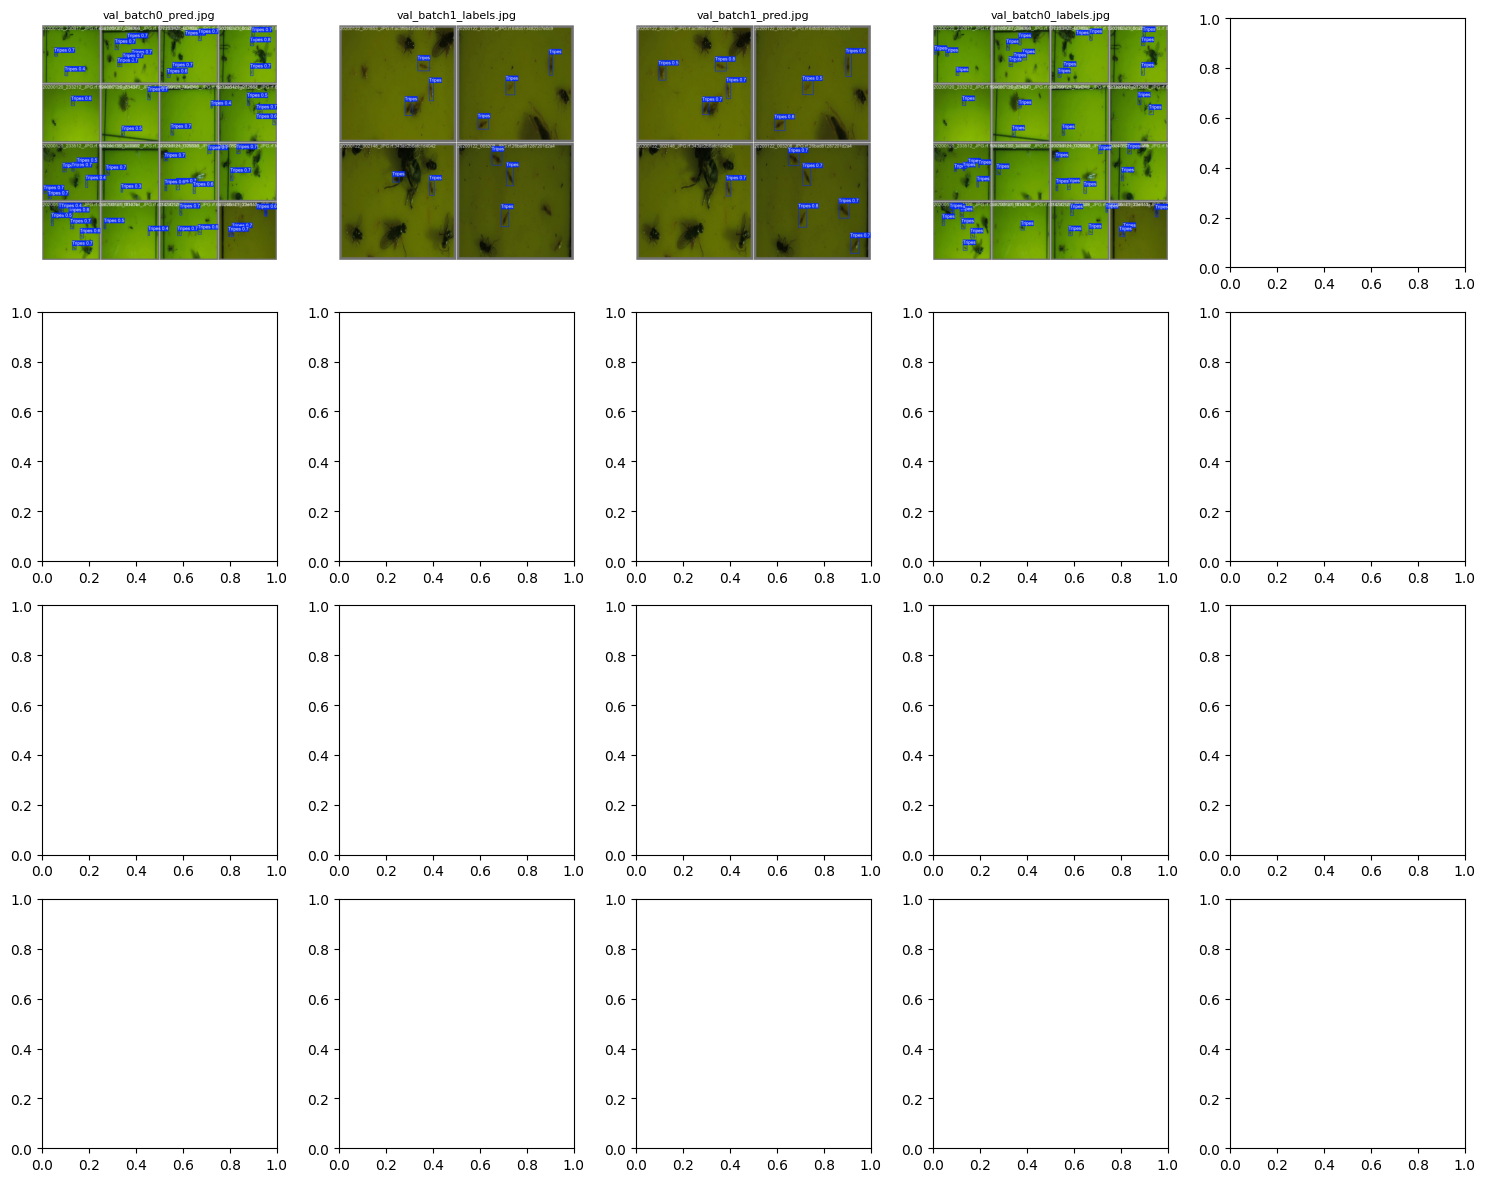

✅ Exibidas 4 imagens de treinamento.
📂 As imagens estão localizadas em: /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ResultsValBatch.


In [ ]:
#Mostrar 20 imagens treinadas do algoritimo
import os
import matplotlib.pyplot as plt
import cv2
import random

# Caminho da pasta onde as imagens dos resultados do treinamento foram salvas
results_path = "/content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ResultsValBatch"
# Verifica se a pasta existe
if not os.path.exists(results_path):
    print(f"❌ Erro: A pasta '{results_path}' não foi encontrada. Verifique o caminho e tente novamente.")
else:
    # Lista todas as imagens disponíveis (formatos comuns: .jpg, .png)
    image_files = [f for f in os.listdir(results_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Verifica se há imagens na pasta
    if not image_files:
        print(f"⚠️ Nenhuma imagem encontrada na pasta '{results_path}'. Verifique se o treinamento gerou resultados corretamente.")
    else:
        # Seleciona até 20 imagens aleatórias para exibição
        num_images = min(20, len(image_files))
        selected_images = random.sample(image_files, num_images)

        # Exibe as imagens
        fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # Grade de 4x5 para até 20 imagens
        axes = axes.flatten()  # Facilita a iteração sobre os eixos

        for ax, img_name in zip(axes, selected_images):
            img_path = os.path.join(results_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB

            ax.imshow(img)
            ax.set_title(img_name, fontsize=8)
            ax.axis("off")

        plt.tight_layout()
        plt.show()

        print(f"✅ Exibidas {num_images} imagens de treinamento.")
        print(f"📂 As imagens estão localizadas em: {results_path}.")


Colunas disponíveis no arquivo de métricas: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Primeiras linhas dos dados:
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  15.3906         5.57019         6.43402         4.17786   
1      2  26.2306         5.25257         5.62872         3.89099   
2      3  36.0301         4.08193         4.20800         3.46551   
3      4  45.3880         3.31723         3.15130         2.97043   
4      5  54.0460         3.00127         2.77427         2.73011   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                   0.0                0.0               0.0   
1                   0.0                0.0               0.0   
2                   0.0         

<Figure size 1500x1000 with 0 Axes>

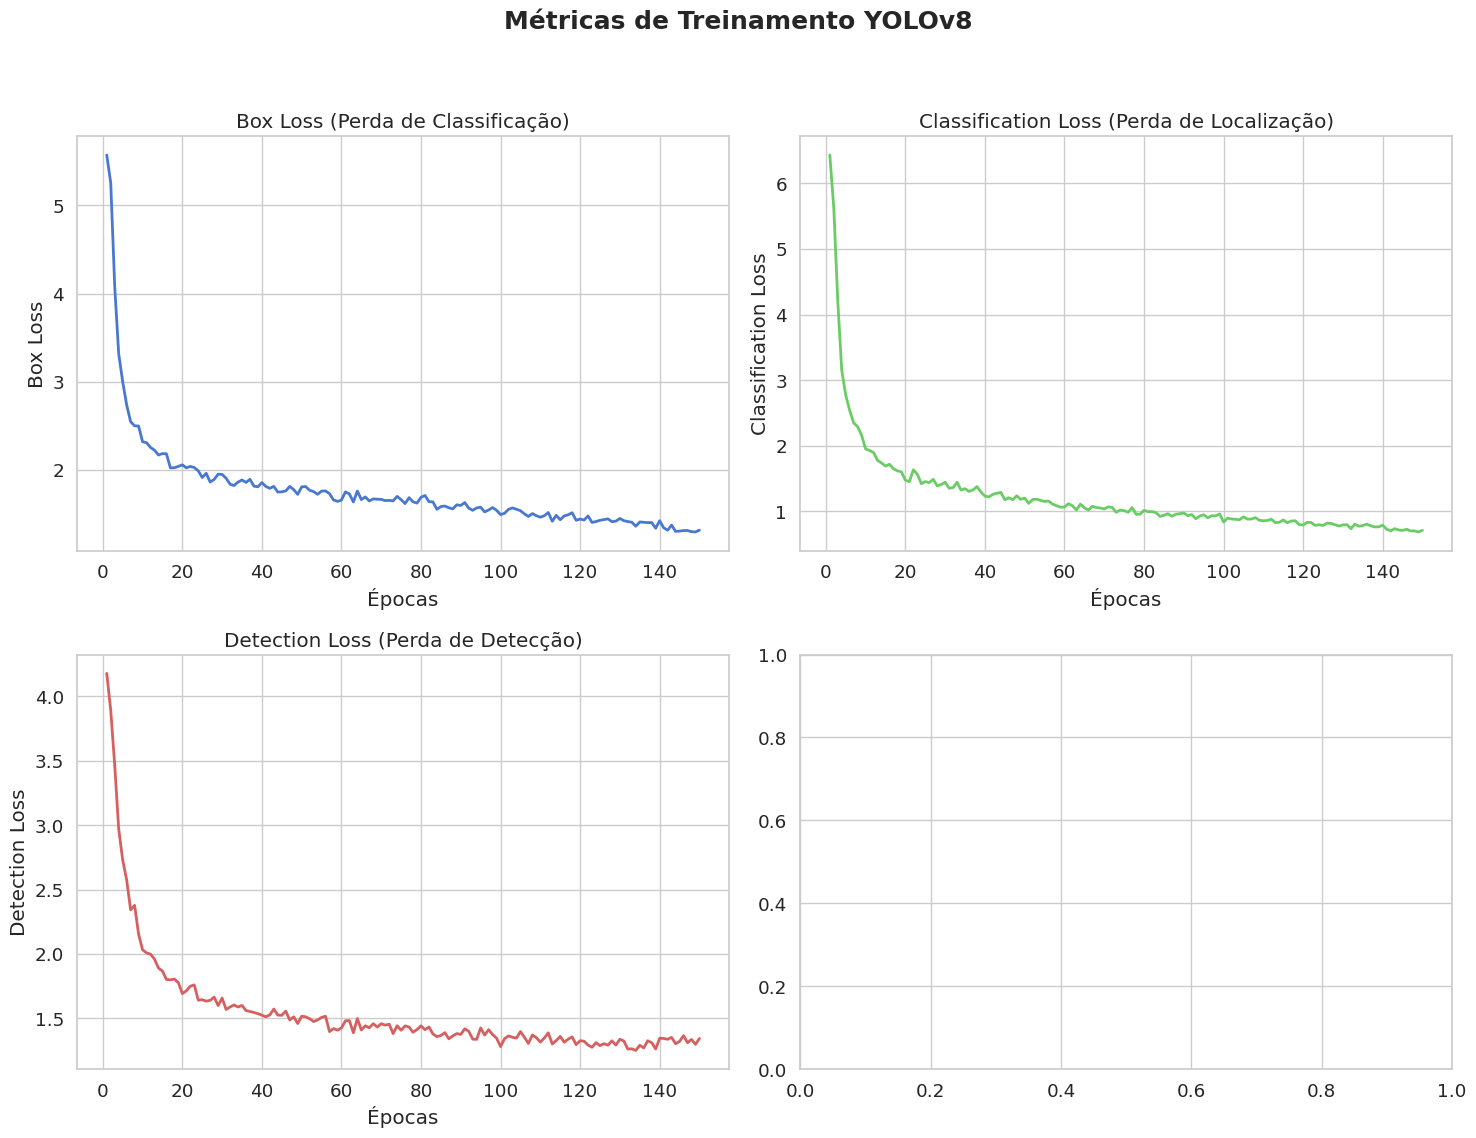

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Caminho para o arquivo de métricas
results_csv_path = os.path.join(drive_project_path, 'ImagesResultsTrain', 'results.csv')

# Carregar os dados das métricas
if os.path.exists(results_csv_path):
    metrics_df = pd.read_csv(results_csv_path)
    print("Colunas disponíveis no arquivo de métricas:", metrics_df.columns)
    print("Primeiras linhas dos dados:\n", metrics_df.head())
else:
    print("Arquivo results.csv não encontrado. Verifique se o treinamento foi concluído com sucesso e o caminho está correto.")

# Verifique as colunas e ajuste os nomes de acordo com as métricas disponíveis
# Colunas comuns em arquivos de métricas YOLOv8 são: `train/box_loss`, `train/cls_loss`, `train/dfl_loss`, `metrics/mAP_0.5`, etc.

# Configurar estilo do gráfico
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(15, 10))

# Plotar métricas detalhadas
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Métricas de Treinamento YOLOv8', fontsize=18, fontweight='bold')

# Verificar se o índice é a coluna de épocas e definir se necessário
if 'epoch' in metrics_df.columns:
    metrics_df.set_index('epoch', inplace=True)

# 1. Box Loss
if 'train/box_loss' in metrics_df.columns:
    sns.lineplot(data=metrics_df, x=metrics_df.index, y="train/box_loss", ax=axs[0, 0], color='b', linewidth=2)
    axs[0, 0].set_title("Box Loss (Perda de Classificação)")
    axs[0, 0].set_xlabel("Épocas")
    axs[0, 0].set_ylabel("Box Loss")

# 2. Classification Loss
if 'train/cls_loss' in metrics_df.columns:
    sns.lineplot(data=metrics_df, x=metrics_df.index, y="train/cls_loss", ax=axs[0, 1], color='g', linewidth=2)
    axs[0, 1].set_title("Classification Loss (Perda de Localização)")
    axs[0, 1].set_xlabel("Épocas")
    axs[0, 1].set_ylabel("Classification Loss")

# 3. Detection Loss
if 'train/dfl_loss' in metrics_df.columns:
    sns.lineplot(data=metrics_df, x=metrics_df.index, y="train/dfl_loss", ax=axs[1, 0], color='r', linewidth=2)
    axs[1, 0].set_title("Detection Loss (Perda de Detecção)")
    axs[1, 0].set_xlabel("Épocas")
    axs[1, 0].set_ylabel("Detection Loss")

# 4. mAP (Mean Average Precision)
if 'metrics/mAP_0.5' in metrics_df.columns:
    sns.lineplot(data=metrics_df, x=metrics_df.index, y="metrics/mAP_0.5", ax=axs[1, 1], color='purple', linewidth=2)
    axs[1, 1].set_title("mAP@0.5")
    axs[1, 1].set_xlabel("Épocas")
    axs[1, 1].set_ylabel("mAP@0.5")

# Ajuste de layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Verifique se a métrica metrics/mAP50(B) está presente no DataFrame de métricas
if 'metrics/mAP50(B)' in metrics_df.columns:
    # Pegue a precisão final da última época
    final_map = metrics_df['metrics/mAP50(B)'].iloc[-1] * 100  # Converta para porcentagem
    margem_erro = 100 - final_map  # Margem de erro é o complemento em relação a 100%

    print(f"Precisão Geral do Modelo: {final_map:.2f}%")
    print(f"Margem de Erro do Modelo: {margem_erro:.2f}%")
else:
    print("A métrica 'metrics/mAP50(B)' não foi encontrada no arquivo de métricas.")

Precisão Geral do Modelo: 86.98%
Margem de Erro do Modelo: 13.02%


In [ ]:
import os
from ultralytics import YOLO

# Caminho do modelo treinado
model_path = '/content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/weights/best.pt'

# Verificar se o arquivo do modelo existe
if os.path.exists(model_path):
    print(f"✅ Modelo encontrado: {model_path}")
else:
    print(f"❌ ERRO: Modelo não encontrado em {model_path}. Verifique o caminho e tente novamente.")
    exit()  # Para a execução se o modelo não for encontrado

# Carregar o modelo treinado
model = YOLO(model_path)

# Pasta com imagens novas para inferência
source_folder = "/content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration"

# Criar pasta para salvar os resultados
results_folder = "/content/drive/MyDrive/AgroSense-V4-B_0.22/ResultsTrainBoxes"
os.makedirs(results_folder, exist_ok=True)  # Criar se não existir

# Fazer a inferência e salvar os resultados na pasta especificada
results = model.predict(source=source_folder, save=True, conf=0.5, project=results_folder, name='detections')

print(f"✅ Detecção concluída! Os resultados foram salvos em: {results_folder}")


✅ Modelo encontrado: /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesResultsTrain/ImagesResultsTrain/weights/best.pt

image 1/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_225854.JPG: 384x640 (no detections), 106.2ms
image 2/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230023.JPG: 384x640 1 Tripes, 25.2ms
image 3/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230320.JPG: 384x640 (no detections), 25.2ms
image 4/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230327.JPG: 384x640 (no detections), 25.2ms
image 5/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230549.JPG: 384x640 2 Tripess, 25.2ms
image 6/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230629.JPG: 384x640 2 Tripess, 25.2ms
image 7/102 /content/drive/MyDrive/AgroSense-V4-B_0.22/ImagesGeneration/20200120_230655.JPG: 384x640 (no detections), 25.2ms
image 8/102 /content/dri

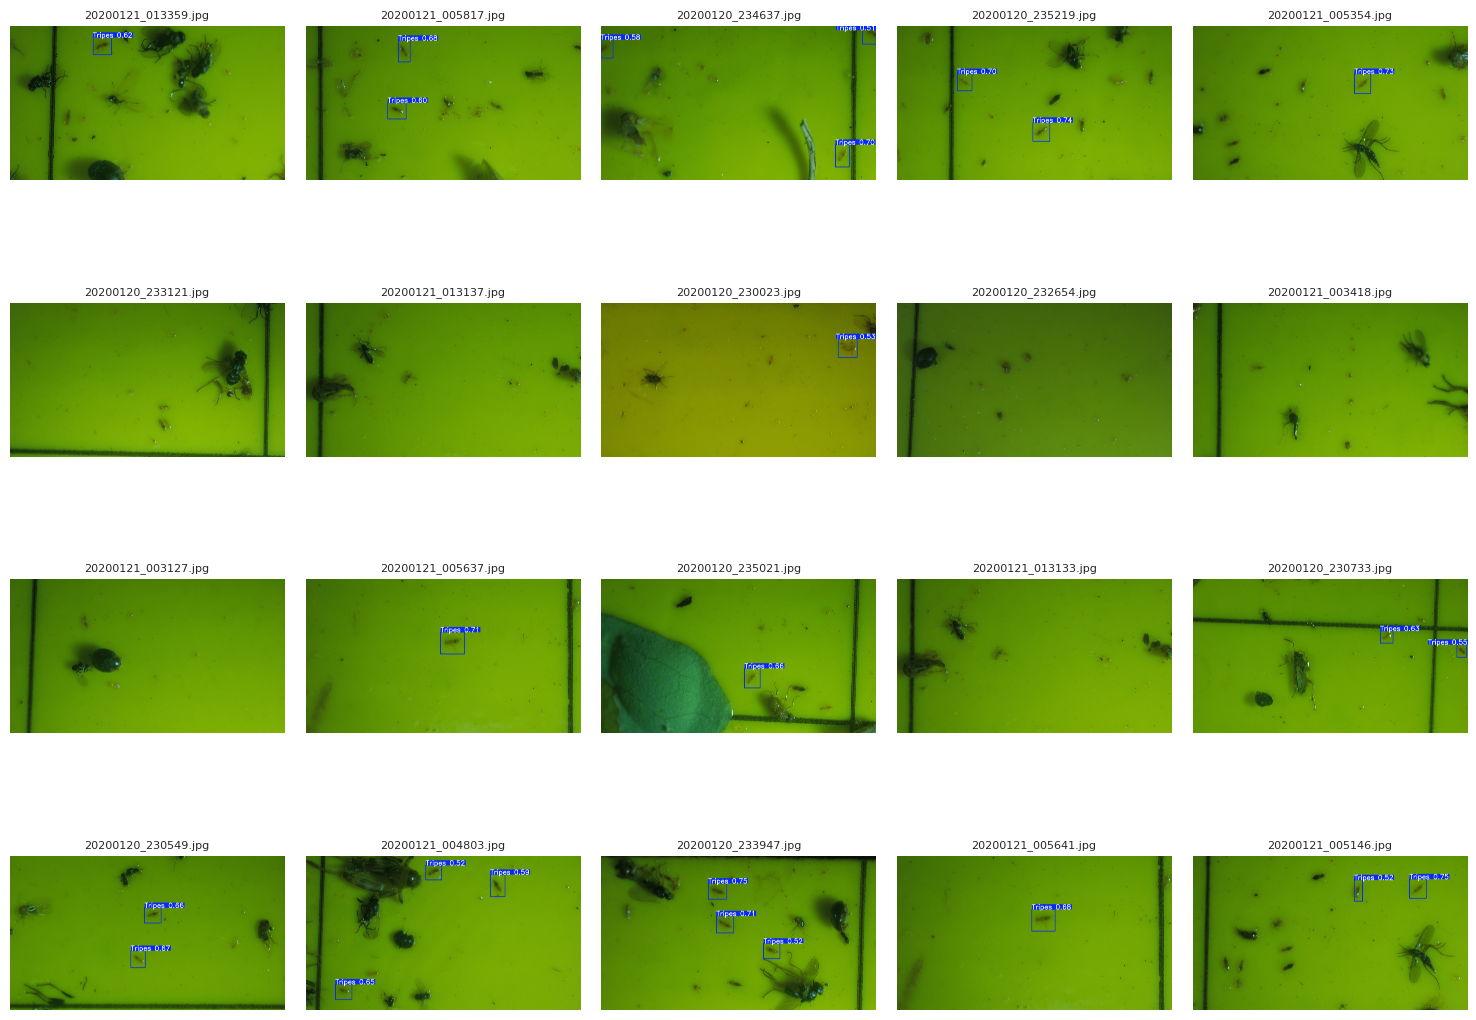

✅ Exibidas 20 imagens de treinamento.
📂 As imagens estão localizadas em: /content/runs/detect/predict.


In [ ]:
#Mostrar 20 imagens treinadas do algoritimo
import os
import matplotlib.pyplot as plt
import cv2
import random

# Caminho da pasta onde as imagens dos resultados do treinamento foram salvas
results_path = "/content/runs/detect/predict"
# Verifica se a pasta existe
if not os.path.exists(results_path):
    print(f"❌ Erro: A pasta '{results_path}' não foi encontrada. Verifique o caminho e tente novamente.")
else:
    # Lista todas as imagens disponíveis (formatos comuns: .jpg, .png)
    image_files = [f for f in os.listdir(results_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Verifica se há imagens na pasta
    if not image_files:
        print(f"⚠️ Nenhuma imagem encontrada na pasta '{results_path}'. Verifique se o treinamento gerou resultados corretamente.")
    else:
        # Seleciona até 20 imagens aleatórias para exibição
        num_images = min(20, len(image_files))
        selected_images = random.sample(image_files, num_images)

        # Exibe as imagens
        fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # Grade de 4x5 para até 20 imagens
        axes = axes.flatten()  # Facilita a iteração sobre os eixos

        for ax, img_name in zip(axes, selected_images):
            img_path = os.path.join(results_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB

            ax.imshow(img)
            ax.set_title(img_name, fontsize=8)
            ax.axis("off")

        plt.tight_layout()
        plt.show()

        print(f"✅ Exibidas {num_images} imagens de treinamento.")
        print(f"📂 As imagens estão localizadas em: {results_path}.")


In [ ]:
insect_counts = {}  # Dicionário para contar as detecções

for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])  # ID da classe detectada
        insect_counts[class_id] = insect_counts.get(class_id, 0) + 1

print("Contagem de insetos detectados:", insect_counts)


# contar insetos por armadilha melhoria

Contagem de insetos detectados: {0: 138}
